# 가위바위보

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.3.0
60000


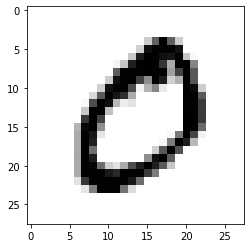

In [19]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [20]:
y_train[1]

0

In [41]:
type(x_train[1])

numpy.ndarray

In [46]:
x_train[1].shape

(28, 28)

In [21]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [23]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [24]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [25]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1966 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0673 - accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0388 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0324 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0420 - accuracy: 0.9873
test_loss: 0.04202922806143761 
test_accuracy: 0.9872999787330627


In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.8221169e-14 4.3373740e-09 7.5284943e-09 7.1469759e-09 2.5550673e-10
 3.0064130e-12 1.6740469e-14 1.0000000e+00 1.2564134e-09 5.3811524e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


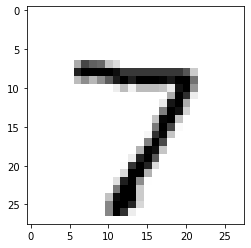

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.4732137e-05 3.5669837e-02 6.7531583e-03 9.8586297e-03 2.5629130e-01
 2.4201706e-04 3.7645223e-04 6.9036597e-01 4.1785729e-04 4.5041126e-08]
라벨: 4, 예측결과: 7


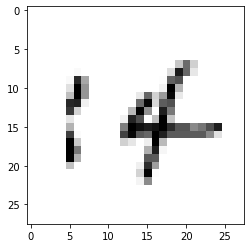

예측확률분포: [4.2930890e-09 1.3242917e-06 2.0309137e-05 1.9834268e-05 2.9163277e-05
 3.0188498e-03 9.0080537e-02 2.9228273e-10 9.0682995e-01 2.9733205e-10]
라벨: 6, 예측결과: 8


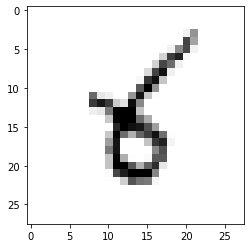

예측확률분포: [9.2855536e-11 4.5968776e-10 7.5064963e-01 2.4918887e-01 5.1412596e-11
 6.8919437e-10 6.0966054e-09 8.5662587e-06 1.5295837e-04 7.6205344e-12]
라벨: 3, 예측결과: 2


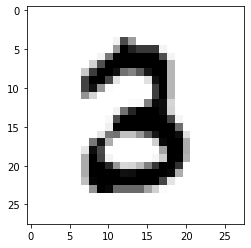

예측확률분포: [1.85700372e-10 1.68817962e-07 9.93555367e-01 1.72424392e-04
 1.40990615e-08 1.97606713e-08 1.86264320e-11 6.27100375e-03
 1.09704183e-06 5.90487251e-12]
라벨: 3, 예측결과: 2


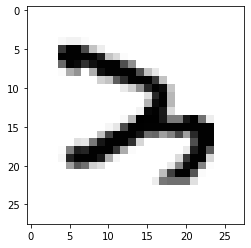

예측확률분포: [4.2509654e-07 1.8465388e-04 3.7344194e-05 1.0296190e-05 6.6052198e-01
 2.3292527e-05 2.9690266e-06 2.4115585e-02 1.7805390e-01 1.3704945e-01]
라벨: 9, 예측결과: 4


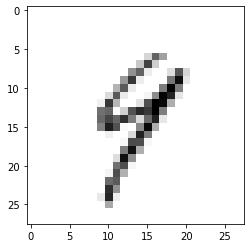

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_channel_3=64
n_dense_1=64
n_dense_2=32
n_dense_3=16
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_1, activation='relu'))
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
model.add(keras.layers.Dense(n_dense_3, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

# 이제 직접 가위바위보 이미지를 가져와서 딥러닝을 돌려보겠습니다.

## 1. 데이터 가져와서 확인하기

In [18]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
img_path = 'five/bojagi'
img_test = 'five/bojagi/0.jpg'

In [4]:
images=glob.glob(img_path + "/*.jpg")  

In [337]:
images

424

In [6]:
print(len(images), " images to be resized.")

424  images to be resized.


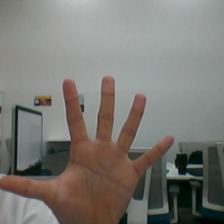

In [7]:
Image.open(img_test)

In [8]:
test = Image.open(img_test)

In [9]:
temp = np.array(Image.open(img_test))

In [10]:
temp.shape

(224, 224, 3)

In [11]:
temp[0].max()

196

In [12]:
temp[1].max()

194

In [13]:
temp[2].max()

192

In [14]:
test2 = 'five/scissor/0.jpg'

In [15]:
temp2 = Image.open(test2)

In [16]:
temp2_np = np.array(temp2)

In [17]:
print(temp2_np[0].max())
print(temp2_np[1].max())
print(temp2_np[2].max())


194
194
194


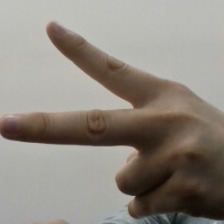

In [18]:
temp2

In [19]:
print(temp2_np[0][0])

[192 193 188]


In [20]:
np.where(temp2_np[0] == 192)

(array([  0,   1,   2,  17,  18,  19,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  40,  41,  42,  45,  46,  47,
         58,  58,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  96,  97,  98,  99, 104, 114,
        115, 118, 119, 120, 121, 127, 141, 142], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [21]:
print(temp2_np[0][0][0])

192


In [22]:
print(temp2_np)

[[[192 193 188]
  [192 193 188]
  [192 193 188]
  ...
  [187 187 185]
  [187 187 185]
  [187 187 185]]

 [[192 193 188]
  [192 193 188]
  [192 193 188]
  ...
  [187 187 185]
  [187 187 185]
  [187 187 185]]

 [[192 193 188]
  [192 193 188]
  [192 193 188]
  ...
  [186 186 184]
  [186 186 184]
  [186 186 184]]

 ...

 [[166 166 166]
  [165 165 165]
  [164 164 164]
  ...
  [124 129 132]
  [115 120 123]
  [107 115 117]]

 [[164 164 164]
  [164 164 164]
  [163 163 163]
  ...
  [123 133 135]
  [114 124 126]
  [110 120 122]]

 [[163 163 163]
  [163 163 163]
  [163 163 163]
  ...
  [120 131 133]
  [111 122 124]
  [110 121 123]]]


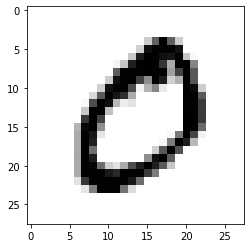

In [23]:
plt.imshow(x_train[1],cmap=plt.cm.binary)


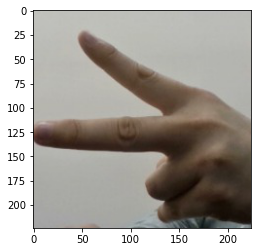

In [24]:
plt.imshow(temp2_np, cmap=plt.cm.binary)

# 데이터를 가져와 넘파이 배열을 만드니 위 글씨와 비슷한 구조의 배열이 생겼다.

# 텐서플로우에 있던 글씨 배열과 차이점은

## 글씨 배열은 크기가 28 * 28이고 색 구분 흑백이기 때문에 2차원 배열로 표현이 가능했다.

## 그와 다르게 손모양은 크기가 224 * 224이고 rgb를 표현하기 위해 3차원 배열로 표현했다.

# 글씨 : 28 * 28 손모양: 224 * 224 * 3

### 또한 글씨는 글씨 아닌부분이 흰색으로 0으로 표기되어 글씨만 데이터로 인식이 되었지만

### 손글씨는 뒤 배경도 색도 rgb이 있었다.

# 그래서 필자는 먼저 손모양 데이터를 넘파이 배열로 바꾸고

# 살색 rgb값을 찾아 그 값이 아닌 부분을 검은색(000000)으로 바꿀 계획이다.

In [41]:
temp2_np

array([[[192, 193, 188],
        [192, 193, 188],
        [192, 193, 188],
        ...,
        [187, 187, 185],
        [187, 187, 185],
        [187, 187, 185]],

       [[192, 193, 188],
        [192, 193, 188],
        [192, 193, 188],
        ...,
        [187, 187, 185],
        [187, 187, 185],
        [187, 187, 185]],

       [[192, 193, 188],
        [192, 193, 188],
        [192, 193, 188],
        ...,
        [186, 186, 184],
        [186, 186, 184],
        [186, 186, 184]],

       ...,

       [[166, 166, 166],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [124, 129, 132],
        [115, 120, 123],
        [107, 115, 117]],

       [[164, 164, 164],
        [164, 164, 164],
        [163, 163, 163],
        ...,
        [123, 133, 135],
        [114, 124, 126],
        [110, 120, 122]],

       [[163, 163, 163],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [120, 131, 133],
        [111, 122, 124],
        [110, 121, 123]]

In [43]:
print(len(temp2_np[:,:,0]))

224


In [53]:
print(temp2_np[:,:,0])

[[192 192 192 ... 187 187 187]
 [192 192 192 ... 187 187 187]
 [192 192 192 ... 186 186 186]
 ...
 [166 165 164 ... 124 115 107]
 [164 164 163 ... 123 114 110]
 [163 163 163 ... 120 111 110]]


In [42]:
print(len(temp2_np[:,:,1]))

224


# temp2_np[:,:,1] 을 통해 rgb 값을 3개를 나눠서 가져올수 있었다.

# 이제 np.where을 통해 값을 바꿔보자.

# 검색 도중 opencv를 쓰기로 했는데

# 방법이 원래 쓸려고 했던 rgb와 hcv 가 있어서 두가지를 다 구해 해볼 예정이다.

In [51]:
test_cut = temp2_np.copy()

In [52]:
np.where((test_cut[:,:,0] >= 244) & (test_cut[:,:,0] <= 255) )

(array([], dtype=int64), array([], dtype=int64))

# 먼저 opencv 로 읽어보기로 했다.

In [19]:
import matplotlib.image as mpimg

In [20]:
import cv2
print(cv2.__version__)

4.5.5


In [87]:
test_cv = cv2.imread('five/bojagi/0.jpg', 0)

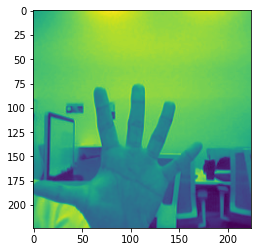

In [88]:
plt.imshow(test_cv)

In [96]:
test_cv

array([[114, 115, 115, ..., 148, 148, 147],
       [115, 116, 116, ..., 149, 148, 147],
       [115, 116, 117, ..., 149, 148, 148],
       ...,
       [134, 133, 132, ...,   4,   5,   6],
       [133, 131, 130, ...,   2,   2,   2],
       [131, 130, 129, ...,   1,   1,   1]], dtype=uint8)

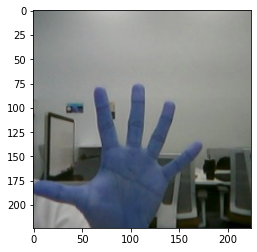

In [120]:
test_cv1 = cv2.imread('five/bojagi/0.jpg')
plt.imshow(test_cv1)

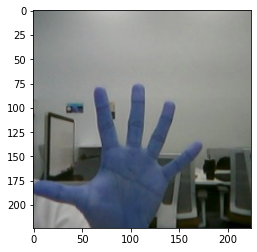

In [91]:
test_cv2 = cv2.imread('five/bojagi/0.jpg', 1)
plt.imshow(test_cv2)

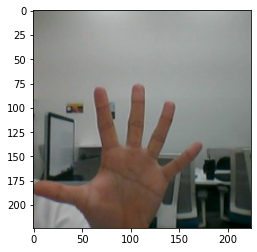

In [104]:
test_mp = mpimg.imread('five/bojagi/0.jpg',0)
plt.imshow(test_mp)

In [242]:
test_hsv = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)

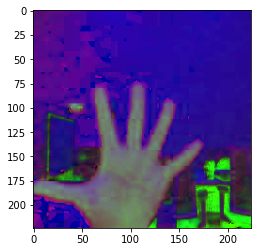

In [243]:
plt.imshow(test_hsv)

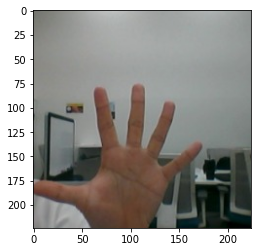

In [124]:
test_cov = cv2.cvtColor(test_cv1, cv2.COLOR_BGR2RGB)
plt.imshow(test_cov)

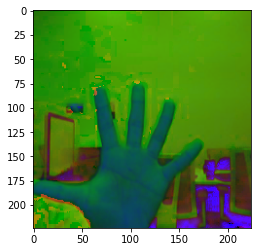

In [129]:
test_cov2 = cv2.cvtColor(test_cv1, cv2.COLOR_BGR2HLS)
plt.imshow(test_cov2)

# opencv로 사진을 출력하면 색 형태가 bgr로 나왔다

# 그래서 cvtColor를 사용해 rgb로 바꿨다.

In [138]:
low = (28, 110, 2)
up = (120, 150, 10)

In [145]:
temp = cv2.inRange(test_cov2, (9, 57, 66), (15, 83, 102))

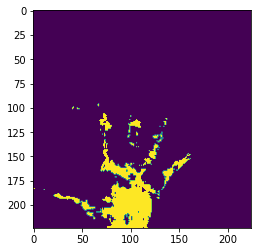

In [151]:
plt.imshow(temp)

# 예상보다 손 모양이 나왔다. 범위 조정을 통해 손모양이 나오게 하겠다.

# 1. 최솟값을 조정

## 1-1 최솟값을 더 낮춰보자

In [5]:
import seaborn as sns

In [180]:
low = (9,57,66)
up = (15,83,102)
low_temp = list(low)

In [181]:
low_temp

[9, 57, 66]

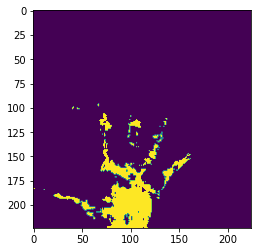

In [177]:
temp2 = cv2.inRange(test_cov2, low, (15, 83, 102))
plt.imshow(temp2)

In [220]:
low_temp = list(low)
low_temp

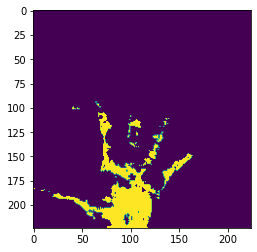

In [223]:
temp2 = cv2.inRange(test_cov2, (8 ,57, 66) , (15, 83, 102))
plt.imshow(temp2)

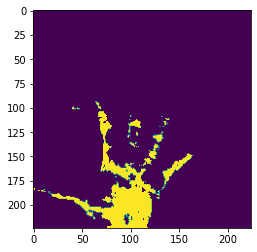

In [224]:
temp2 = cv2.inRange(test_cov2, (7 ,57, 66) , (15, 83, 102))
plt.imshow(temp2)

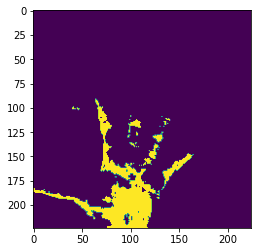

In [225]:
temp2 = cv2.inRange(test_cov2, (1 ,57, 66) , (15, 83, 102))
plt.imshow(temp2)

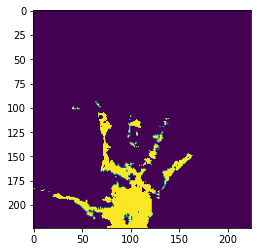

In [226]:
temp2 = cv2.inRange(test_cov2, (8 ,57, 66) , (15, 83, 102))
plt.imshow(temp2)

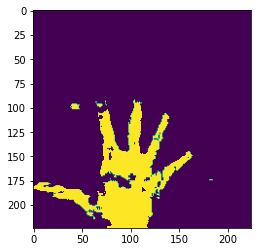

In [236]:
temp3 = cv2.inRange(test_cov2, (8 ,42, 66) , (200, 203, 200))
plt.imshow(temp3)

In [245]:
h, s, v = cv2.split(test_hsv)

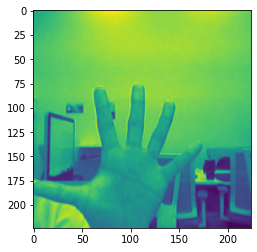

In [273]:
plt.imshow(v)

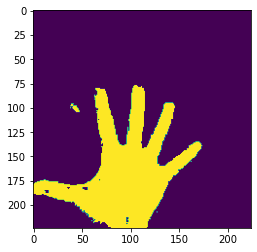

In [332]:
temp3 = cv2.inRange(test_hsv, (100 ,42, 80) , (120, 150, 150))
plt.imshow(temp3)

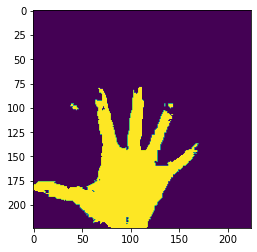

In [330]:
temp3 = cv2.inRange(test_hsv, (100 ,80, 80) , (115, 150, 150))
plt.imshow(temp3)

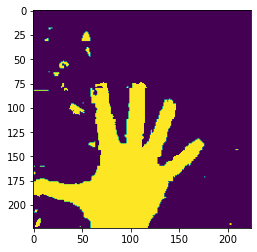

In [331]:
temp3 = cv2.inRange(h, 100, 120)
plt.imshow(temp3)

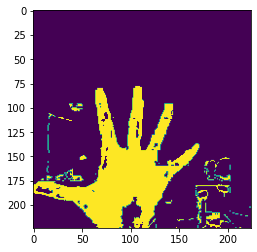

In [323]:
temp3 = cv2.inRange(s, 80, 135)
plt.imshow(temp3)

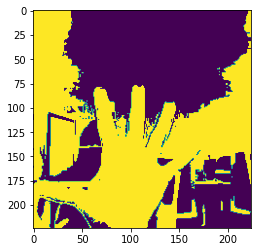

In [322]:
temp3 = cv2.inRange(v, 80, 150)
plt.imshow(temp3)

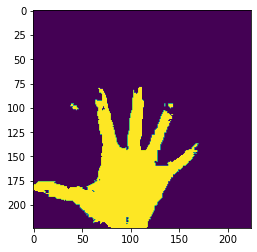

In [333]:
temp3 = cv2.inRange(test_hsv, (100 ,80, 80) , (115, 150, 150))
plt.imshow(temp3)

In [345]:
a = [i for i in range(425)] 
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [347]:
print('five/bojagi_test/' + str(a[0]) + '.jpg')

five/bojagi_test/0.jpg


In [350]:
images[0]

'five/bojagi\\0.jpg'

In [352]:
len(images)

424

# 일단 손 모양이 나와서 위 기준대로 각 사진들을 변환해 저장~~

# 그뒤에 사진이 잘 나왔나 확인할 예정이다.

In [361]:
for i in range(len(images)):
    #이미지 불러오기
    test_mp = mpimg.imread(images[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,80, 80) , (115, 150, 150))
    #이미지 저장
    cv2.imwrite('five/bojagi_test/' + str(a[i]) + '.jpg', change)



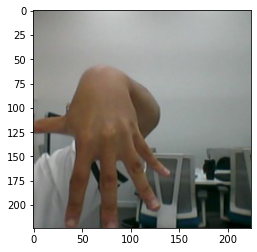

In [356]:
test_mp = mpimg.imread(images[200], 0)
plt.imshow(test_mp)

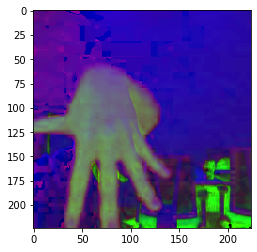

In [358]:
temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
plt.imshow(temp)

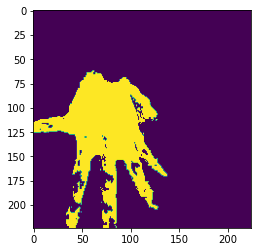

In [359]:
change = cv2.inRange(temp, (100 ,80, 80) , (115, 150, 150))
plt.imshow(change)

In [360]:
cv2.imwrite('five/bojagi_test/' + str(a[0]) + '.jpg', change)

True

## 파일 생성이 정상적으로 되었다. 일단 잘 나온 데이터와 안그런 데이터가 있지만

## 나중에 다시 없애기로 하고 일단 나머지 주먹 가위 데이터를 만들기로 했다.

In [21]:
img_ju = 'five/jumack'
img_sci = 'five/sci'

In [22]:
images_ju=glob.glob(img_ju + "/*.jpg")  
images_sci=glob.glob(img_sci + "/*.jpg")  

In [24]:
len(images_sci)

425

In [98]:
b = [i for i in range(426)]

In [367]:
for i in range(len(images_ju)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ju[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,80, 80) , (115, 150, 150))
    #이미지 저장
    cv2.imwrite('five/jumack_test/' + str(b[i]) + '.jpg', change)



In [369]:
for i in range(len(images_sci)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_sci[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,80, 80) , (115, 150, 150))
    #이미지 저장
    cv2.imwrite('five/sci_test/' + str(b[i]) + '.jpg', change)



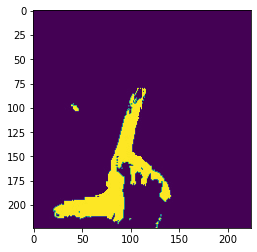

In [10]:
test_mp = mpimg.imread('five/sci_test/0.jpg')
plt.imshow(test_mp)

In [372]:
t = np.array(test_mp)
t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

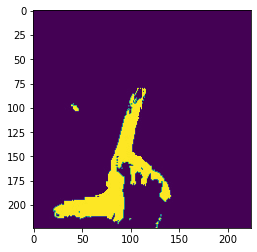

In [373]:
plt.imshow(t)

In [374]:
print(t.min())
print(t.max())

0
255


In [25]:
img_bo = 'five/paper'
images_bo=glob.glob(img_bo + "/*.jpg")  
temp = 'five/paper/0.jpg'

In [75]:
img_ro = 'five/rock'
images_ro=glob.glob(img_ro + "/*.jpg")  

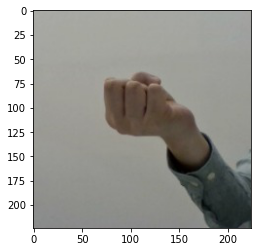

In [76]:
test_mp = mpimg.imread(images_ro[0], 0)
plt.imshow(test_mp)

In [109]:
test_mp = mpimg.imread(images_bo[0], 0)

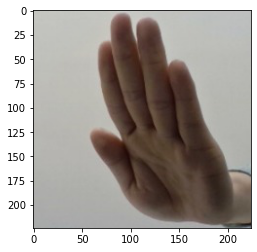

In [110]:
temp = plt.imshow(test_mp)

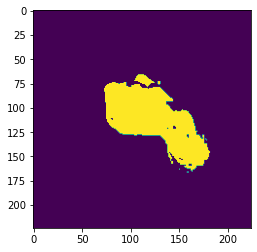

In [77]:
temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
#이미지 변환
change = cv2.inRange(temp, (100 ,50, 0) , (118, 250, 115))
plt.imshow(change)

In [32]:
h, s, v = cv2.split(temp)

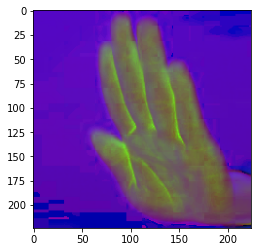

In [37]:
plt.imshow(temp)

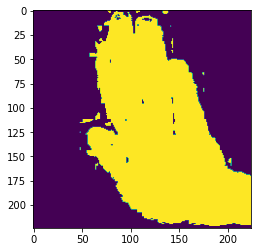

In [53]:
h1 = cv2.inRange(h, 100, 118)
plt.imshow(h1)

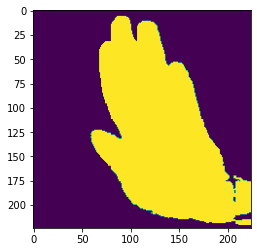

In [66]:
s1 = cv2.inRange(s, 50, 250)
plt.imshow(s1)

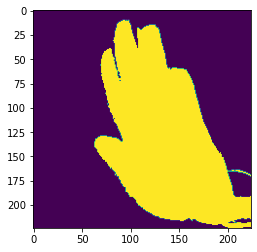

In [90]:
v1 = cv2.inRange(v, 0, 115)
plt.imshow(v1)

# 사진 중 필요한 부분만 남길려고 조정을 하던 중

# 여러 범위로 데이터를 처리해야 된다는 점을 알게 되었다.

In [78]:
img_ro = 'five/rock'
images_ro=glob.glob(img_ro + "/*.jpg")  
img_bo = 'five/paper'
images_bo=glob.glob(img_bo + "/*.jpg")  
img_si = 'five/scissor'
images_si=glob.glob(img_si + "/*.jpg")  

In [86]:
a = len(images_ro)
b = len(images_bo)
c = len(images_si)

In [96]:
a_n = [i for i in range(a)]
b_n = [i for i in range(b)]
c_n = [i for i in range(c)]

In [102]:
for i in range(len(images_ro)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,50, 0) , (118, 250, 115))
    #이미지 저장
    cv2.imwrite('five/rock_test/' + str(a_n[i]) + '.jpg', change)



In [103]:
for i in range(len(images_bo)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,50, 0) , (118, 250, 115))
    #이미지 저장
    cv2.imwrite('five/paper_test/' + str(b_n[i]) + '.jpg', change)



In [104]:
for i in range(len(images_si)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (100 ,50, 0) , (118, 250, 115))
    #이미지 저장
    cv2.imwrite('five/scissor_test/' + str(c_n[i]) + '.jpg', change)



In [6]:
img_ro = 'five/direct/rock'
images_ro=glob.glob(img_ro + "/*.jpg")  
img_bo = 'five/direct/paper'
images_bo=glob.glob(img_bo + "/*.jpg")  
img_si = 'five/direct/scissor'
images_si=glob.glob(img_si + "/*.jpg")  

In [7]:
a = len(images_ro)
b = len(images_bo)
c = len(images_si)

In [8]:
a_n = [i for i in range(a)]
b_n = [i for i in range(b)]
c_n = [i for i in range(c)]

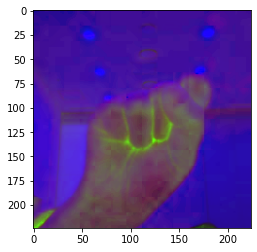

In [9]:
test_mp = mpimg.imread(images_ro[0], 0)
temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
plt.imshow(temp)

In [10]:
h, s, v = cv2.split(temp)

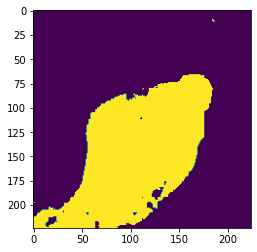

In [40]:
h1 = cv2.inRange(h, 94, 120)
plt.imshow(h1)

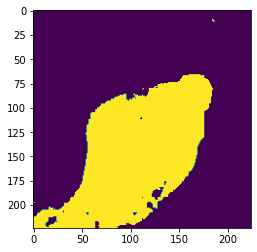

In [42]:
h1 = cv2.inRange(h, 94, 117)
plt.imshow(h1)

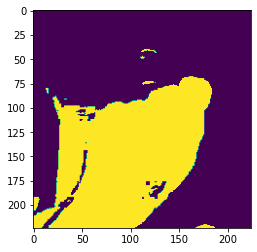

In [105]:
s1 = cv2.inRange(s, 35, 500)
plt.imshow(s1)

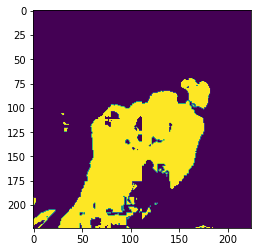

In [79]:
s1 = cv2.inRange(s, 60, 170)
plt.imshow(s1)

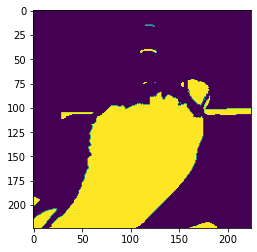

In [80]:
v1 = cv2.inRange(v, 0, 115)
plt.imshow(v1)

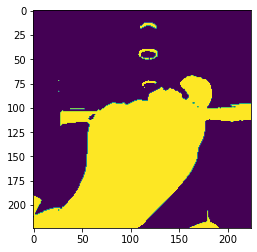

In [111]:
v1 = cv2.inRange(v, 0, 140)
plt.imshow(v1)

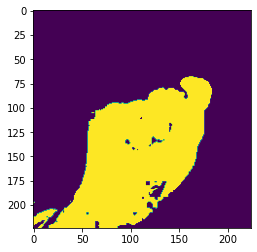

In [113]:
change = cv2.inRange(temp, (94 ,35, 20) , (117, 170, 145))
plt.imshow(change)

In [114]:
for i in range(len(images_ro)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (94 ,35, 20) , (117, 170, 145))
    #이미지 저장
    cv2.imwrite('five/rock_test2/' + str(a_n[i]) + '.jpg', change)



In [115]:
for i in range(len(images_bo)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (94 ,35, 20) , (117, 170, 145))
    #이미지 저장
    cv2.imwrite('five/paper_test2/' + str(b_n[i]) + '.jpg', change)



In [116]:
for i in range(len(images_si)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si[i], 0)
    temp = cv2.cvtColor(test_mp, cv2.COLOR_BGR2HSV)
    #이미지 변환
    change = cv2.inRange(temp, (94 ,35, 20) , (117, 170, 145))
    #이미지 저장
    cv2.imwrite('five/scissor_test2/' + str(c_n[i]) + '.jpg', change)



# 전처리된 이미지가 생성이 되었으므로 train, test 데이터로 나누어

# 훈련 후 성능을 확인하겠습니다.

In [66]:
#1번째 데이터
img_ro1 = 'five/jumack_test'
images_ro1=glob.glob(img_ro1 + "/*.jpg")  
img_bo1 = 'five/bojagi_test'
images_bo1=glob.glob(img_bo1 + "/*.jpg")  
img_si1 = 'five/sci_test'
images_si1=glob.glob(img_si1 + "/*.jpg")  
#2번째 데이터
img_ro2 = 'five/rock_test'
images_ro2=glob.glob(img_ro2 + "/*.jpg")  
img_bo2 = 'five/paper_test'
images_bo2=glob.glob(img_bo2 + "/*.jpg")  
img_si2 = 'five/scissor_test'
images_si2=glob.glob(img_si2 + "/*.jpg")  
#3번째 데이터
img_ro3 = 'five/rock_test2'
images_ro3=glob.glob(img_ro3 + "/*.jpg")  
img_bo3 = 'five/paper_test2'
images_bo3=glob.glob(img_bo3 + "/*.jpg")  
img_si3 = 'five/scissor_test2'
images_si3=glob.glob(img_si3 + "/*.jpg")  

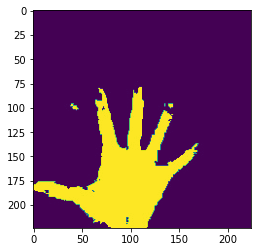

In [118]:
test_mp = mpimg.imread(images_bo1[0], 0)
plt.imshow(test_mp)

In [67]:
ro1 = []
bo1 = []
si1 = []
ro2 = []
bo2 = []
si2 = []
ro3 = []
bo3 = []
si3 = []

In [68]:
for i in range(len(images_ro1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro1[i], 0)
    ro1.append(test_mp)

for i in range(len(images_bo1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo1[i], 0)
    bo1.append(test_mp)

for i in range(len(images_si1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si1[i], 0)
    si1.append(test_mp)

for i in range(len(images_ro2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro2[i], 0)
    ro2.append(test_mp)

for i in range(len(images_bo2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo2[i], 0)
    bo2.append(test_mp)

for i in range(len(images_si2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si2[i], 0)
    si2.append(test_mp)

for i in range(len(images_ro3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro3[i], 0)
    ro3.append(test_mp)

for i in range(len(images_bo3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo3[i], 0)
    bo3.append(test_mp)

for i in range(len(images_si3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si3[i], 0)
    si3.append(test_mp)



In [69]:
ro1 = np.array(ro1)
bo1 = np.array(bo1)
si1 = np.array(si1)
ro2 = np.array(ro2)
bo2 = np.array(bo2)
si2 = np.array(si2)
ro3 = np.array(ro3)
bo3 = np.array(bo3)
si3 = np.array(si3)

In [124]:
type(si2)

numpy.ndarray

In [70]:
length = len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3) + len(si3)
print(length)

2475


In [71]:
y = np.array([])

In [47]:
y = np.append(y, 5)

In [72]:
print(len(ro1))
print(len(bo1))
print(len(si1))
print(len(ro2))
print(len(bo2))
print(len(si2))
print(len(ro3))
print(len(bo3))
print(len(si3))

425
424
425
101
100
100
300
300
300


In [73]:
for i in range(length):
    if i < len(ro1):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1)):
        y = np.append(y, 2)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2)):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2)):
        y = np.append(y, 2)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3)):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3) + len(si3)):
        y = np.append(y, 2)
   

In [129]:
y[425]

1.0

In [74]:
x = np.array([])

In [132]:
x.shape

(124185600,)

In [75]:
x = np.append(x, ro1)
x = np.append(x, bo1)
x = np.append(x, si1)
x = np.append(x, ro2)
x = np.append(x, bo2)
x = np.append(x, si2)
x = np.append(x, ro3)
x = np.append(x, bo3)
x = np.append(x, si3)

In [76]:
x = np.reshape(x, (2475, 224, 224))

In [77]:
x.shape

(2475, 224, 224)

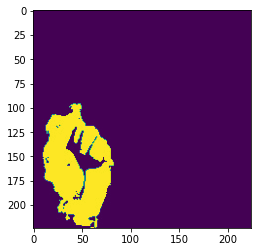

In [79]:
plt.imshow(x[200])

In [135]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


In [80]:
x_temp = x.copy()

In [81]:
x_temp=x_temp.reshape( -1, 224, 224, 1)

In [82]:
x_temp.shape

(2475, 224, 224, 1)

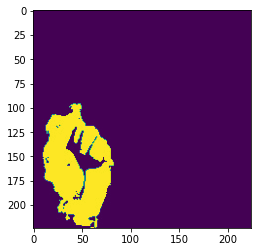

In [83]:
plt.imshow(x[200])

# 데이터 나누기

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size=0.2, random_state=80)

In [140]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
62/62 [==============================] - 36s 587ms/step - loss: 11.6508 - accuracy: 0.7399
Epoch 2/10
62/62 [==============================] - 39s 625ms/step - loss: 0.0865 - accuracy: 0.9768
Epoch 3/10
62/62 [==============================] - 47s 753ms/step - loss: 0.0131 - accuracy: 0.9985
Epoch 4/10
62/62 [==============================] - 38s 618ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
62/62 [==============================] - 39s 625ms/step - loss: 9.4319e-04 - accuracy: 1.0000
Epoch 6/10
62/62 [==============================] - 38s 615ms/step - loss: 5.5959e-04 - accuracy: 1.0000
Epoch 7/10
62/62 [==============================] - 38s 611ms/step - loss: 3.7868e-04 - accuracy: 1.0000
Epoch 8/10
62/62 [==============================] - 38s 617ms/step - loss: 2.6873e-04 - accuracy: 1.0000
Epoch 9/10
62/62 [==============================] - 40s 647ms/step - loss: 1.9925e-04 - accuracy: 1.0000
Epoch 10/10
62/62 [==============================] - 38s 620ms/step - 

In [141]:
test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

16/16 - 3s - loss: 0.2189 - accuracy: 0.9616
test_loss: 0.2188810557126999 
test_accuracy: 0.9616161584854126


# epochs = 20

In [113]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
40/40 [==============================] - 22s 562ms/step - loss: 10.4052 - accuracy: 0.6079
Epoch 2/20
40/40 [==============================] - 22s 551ms/step - loss: 0.2339 - accuracy: 0.9238
Epoch 3/20
40/40 [==============================] - 22s 550ms/step - loss: 0.0598 - accuracy: 0.9841
Epoch 4/20
40/40 [==============================] - 22s 548ms/step - loss: 0.0335 - accuracy: 0.9921
Epoch 5/20
40/40 [==============================] - 22s 554ms/step - loss: 0.0272 - accuracy: 0.9929
Epoch 6/20
40/40 [==============================] - 22s 549ms/step - loss: 0.0164 - accuracy: 0.9968
Epoch 7/20
40/40 [==============================] - 23s 565ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 8/20
40/40 [==============================] - 22s 550ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/20
40/40 [==============================] - 22s 551ms/step - loss: 5.6669e-04 - accuracy: 1.0000
Epoch 10/20
40/40 [==============================] - 22s 552ms/step - loss: 3.8246e-04

In [114]:
test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 0.1944 - accuracy: 0.9524
test_loss: 0.19442835450172424 
test_accuracy: 0.9523809552192688


In [119]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/5
40/40 [==============================] - 22s 553ms/step - loss: 16.1545 - accuracy: 0.7341
Epoch 2/5
40/40 [==============================] - 22s 562ms/step - loss: 0.1350 - accuracy: 0.9667
Epoch 3/5
40/40 [==============================] - 22s 549ms/step - loss: 0.0124 - accuracy: 0.9984
Epoch 4/5
40/40 [==============================] - 22s 549ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 22s 549ms/step - loss: 0.0018 - accuracy: 1.0000
10/10 - 2s - loss: 0.2700 - accuracy: 0.9746
test_loss: 0.2700214684009552 
test_accuracy: 0.9746031761169434


## 처음 10번을 돌렸을때 정확도가 73퍼가 나왔고, 학습하는 내내 정확도가 상승했다.

## 그래서 아 학습을 더 하면 정확도가 올라가겠지라는 생각을 하고 20번 학습을 시켰는데

## 갑자기 2번째 학습부터 정확도가 90을 찍더니 8번째부터는 1로 고정이 되었다.

## 너무 예상과는 다른 진행이 있어서 데이터도 다시 나누고 모델도 다시 초기화하고 돌렸는데도

## 이런 결과가 나왔다. 그래서 5번 돌리면 덜 나오겠지 라는 생각을 해 돌린 결과...

## 4번째 학습부터 모든 걸 깨우쳤고, 20번 학습할때 보다 loss값은 높았지만 정확도는 더 좋았다.

In [142]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size=0.2, random_state=150)

In [144]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7)
test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/7
62/62 [==============================] - 39s 637ms/step - loss: 32.9113 - accuracy: 0.6864
Epoch 2/7
62/62 [==============================] - 38s 620ms/step - loss: 0.1359 - accuracy: 0.9586
Epoch 3/7
62/62 [==============================] - 38s 616ms/step - loss: 0.0514 - accuracy: 0.9889
Epoch 4/7
62/62 [==============================] - 40s 645ms/step - loss: 0.0237 - accuracy: 0.9944
Epoch 5/7
62/62 [==============================] - 38s 611ms/step - loss: 0.0122 - accuracy: 0.9975
Epoch 6/7
62/62 [==============================] - 39s 623ms/step - loss: 0.0088 - accuracy: 0.9980
Epoch 7/7
62/62 [==============================] - 45s 728ms/step - loss: 0.0078 - accuracy: 0.9980
16/16 - 3s - loss: 0.1496 - accuracy: 0.9697
test_loss: 0.14962249994277954 
test_accuracy: 0.9696969985961914


# 이제 전처리 하지 않은 데이터로 훈련해 성능 비교를 해 보겠습니다.

In [85]:
#1번째 데이터
img_ro1 = 'five/jumack'
images_ro1=glob.glob(img_ro1 + "/*.jpg")  
img_bo1 = 'five/bojagi'
images_bo1=glob.glob(img_bo1 + "/*.jpg")  
img_si1 = 'five/sci'
images_si1=glob.glob(img_si1 + "/*.jpg")  
#2번째 데이터
img_ro2 = 'five/rock'
images_ro2=glob.glob(img_ro2 + "/*.jpg")  
img_bo2 = 'five/paper'
images_bo2=glob.glob(img_bo2 + "/*.jpg")  
img_si2 = 'five/scissor'
images_si2=glob.glob(img_si2 + "/*.jpg")  
#3번째 데이터
img_ro3 = 'five/direct/rock'
images_ro3=glob.glob(img_ro3 + "/*.jpg")  
img_bo3 = 'five/direct/paper'
images_bo3=glob.glob(img_bo3 + "/*.jpg")  
img_si3 = 'five/direct/scissor'
images_si3=glob.glob(img_si3 + "/*.jpg")  

ro1 = []
bo1 = []
si1 = []
ro2 = []
bo2 = []
si2 = []
ro3 = []
bo3 = []
si3 = []

for i in range(len(images_ro1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro1[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    ro1.append(test_mp)

for i in range(len(images_bo1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo1[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    bo1.append(test_mp)

for i in range(len(images_si1)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si1[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    si1.append(test_mp)

for i in range(len(images_ro2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro2[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    ro2.append(test_mp)

for i in range(len(images_bo2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo2[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    bo2.append(test_mp)

for i in range(len(images_si2)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si2[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    si2.append(test_mp)

for i in range(len(images_ro3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_ro3[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    ro3.append(test_mp)

for i in range(len(images_bo3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_bo3[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    bo3.append(test_mp)

for i in range(len(images_si3)):
    #이미지 불러오기
    test_mp = mpimg.imread(images_si3[i], 0)
    test_mp = cv2.resize(test_mp, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    si3.append(test_mp)

ro1 = np.array(ro1)
bo1 = np.array(bo1)
si1 = np.array(si1)
ro2 = np.array(ro2)
bo2 = np.array(bo2)
si2 = np.array(si2)
ro3 = np.array(ro3)
bo3 = np.array(bo3)
si3 = np.array(si3)

length = len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3) + len(si3)
print(length)

ro1.shape

2475


(425, 28, 28, 3)

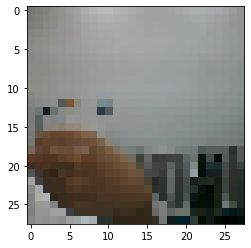

In [86]:
plt.imshow(ro1[0])

In [98]:
type(ro1)

numpy.ndarray

In [87]:
print(len(ro1))
print(len(bo1))
print(len(si1))
print(len(ro2))
print(len(bo2))
print(len(si2))
print(len(ro3))
print(len(bo3))
print(len(si3))

425
424
425
101
100
100
300
300
300


In [88]:
y = np.array([])

for i in range(length):
    if i < len(ro1):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1)):
        y = np.append(y, 2)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2)):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2)):
        y = np.append(y, 2)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3)):
        y = np.append(y, 0)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3)):
        y = np.append(y, 1)
    elif i < (len(ro1) + len(bo1) + len(si1) + len(ro2) + len(bo2) + len(si2) + len(ro3) + len(bo3) + len(si3)):
        y = np.append(y, 2)

In [89]:
y.shape

(2475,)

In [90]:
x = np.array([])
x.shape

(0,)

In [91]:

x.shape

(0,)

In [92]:
x = np.append(x, ro1)
x = np.append(x, bo1)
x = np.append(x, si1)
x = np.append(x, ro2)
x = np.append(x, bo2)
x = np.append(x, si2)
x = np.append(x, ro3)
x = np.append(x, bo3)
x = np.append(x, si3)

print(x.shape)



(5821200,)


In [93]:
x = np.reshape(x, (2475, 28, 28, 3))
print(x.shape)

(2475, 28, 28, 3)


In [99]:
type(x)

numpy.ndarray

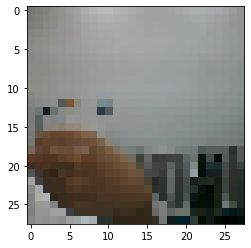

In [101]:
plt.imshow(x[0]/255)

In [104]:
x_temp = x.copy()

x_temp = x_temp/225

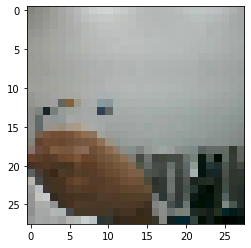

In [105]:
plt.imshow(x_temp[0])

In [110]:


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


print('Model에 추가된 Layer 개수: ', len(model.layers))


x_temp = x_temp.reshape(-1, 28, 28, 3)

print(x_temp.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size=0.2, random_state=80)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수:  8
(2475, 28, 28, 3)
Epoch 1/10
62/62 [==============================] - 1s 12ms/step - loss: 1.0619 - accuracy: 0.4253
Epoch 2/10
62/62 [==============================] - 1s 12ms/step - loss: 0.8014 - accuracy: 0.6934
Epoch 3/10
62/62 [==============================] - 1s 12ms/step - loss: 0.5219 - accuracy: 0.8293
Epoch 4/10
62/62 [==============================] - 1s 12ms/step - loss: 0.3571 - accuracy: 0.8894
Epoch 5/10
62/62 [==============================] - 1s 13ms/step - loss: 0.2294 - accuracy: 0.9374
Epoch 6/10
62/62 [==============================] - 1s 12ms/step - loss: 0.1636 - accuracy: 0.9561
Epoch 7/10
62/62 [==============================] - 1s 12ms/step - loss: 0.1241 - accuracy: 0.9626
Epoch 8/10
62/62 [==============================] - 1s 12ms/step - loss: 0.1126 - accuracy: 0.9611
Epoch 9/10
62/62 [==============================] - 1s 12ms/step - loss: 0.0669 - accuracy: 0.9843
Epoch 10/10
62/62 [==============================] - 1s 13ms/step -

In [113]:


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


print('Model에 추가된 Layer 개수: ', len(model.layers))


x_temp = x_temp.reshape(-1, 28, 28, 3)

print(x_temp.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size=0.4, random_state=80)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7)

test_loss, test_accuracy = model.evaluate(X_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수:  8
(2475, 28, 28, 3)
Epoch 1/7
47/47 [==============================] - 1s 13ms/step - loss: 1.0795 - accuracy: 0.4559
Epoch 2/7
47/47 [==============================] - 1s 12ms/step - loss: 0.8678 - accuracy: 0.6869
Epoch 3/7
47/47 [==============================] - 1s 12ms/step - loss: 0.5492 - accuracy: 0.8263
Epoch 4/7
47/47 [==============================] - 1s 12ms/step - loss: 0.4058 - accuracy: 0.8653
Epoch 5/7
47/47 [==============================] - 1s 12ms/step - loss: 0.3151 - accuracy: 0.9010
Epoch 6/7
47/47 [==============================] - 1s 12ms/step - loss: 0.2216 - accuracy: 0.9421
Epoch 7/7
47/47 [==============================] - 1s 12ms/step - loss: 0.1954 - accuracy: 0.9448
31/31 - 0s - loss: 0.1746 - accuracy: 0.9404
test_loss: 0.17461785674095154 
test_accuracy: 0.9404040575027466


# 더 낮네???

# 비교 결과 성능은 비슷했다.....

# 결론 : opencv 사용조작을 했고, 데이터 전처리 시도를 했다